In [1]:
import fastfusion
from fastfusion.mapper import Metrics
import time

spec = fastfusion.Specification.from_yaml(
    "architectures/fastfusion/tpu_like.yaml",
    "workloads/fastfusion/gemm_16k.yaml",
)
spec.mapper.ffm.metrics = Metrics.ENERGY | Metrics.LATENCY
start = time.time()
pmappings = fastfusion.mapper.FFM.make_pmappings(spec)
mappings = fastfusion.mapper.FFM.join_pmappings(spec, pmappings)
end = time.time()
duration = end - start
print(f"Mapper time: {duration:.2}")

WARNING Loading configuration file from /home/gilbertm/work/venv/fastfusion/config.yaml
Generating pmapping templates for compute scalar_unit Einsum Matmul: 0it [00:00, ?it/s]
Generating pmapping templates for compute MAC Einsum Matmul: 108it [00:08, 12.62it/s]
Generating jobs: 100%|██████████| 2/2 [00:09<00:00,  4.95s/it]
WARNING Einsum Matmul has 108 pmapping templates:
WARNING 	[WA,I,A in MainMemory] T-m,na initial=symbol stride=symbol [A in GlobalBuffer] T-ni initial=symbol stride=symbol [I in GlobalBuffer] T-na initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol S-Y-ni initial=symbol stride=symbol S-X-na initial=symbol stride=symbol [WA in Register] T-m initial=symbol stride=symbol MAC computes Matmul
WARNING 	[WA,I,A in MainMemory] T-m,ni initial=symbol stride=symbol [I in GlobalBuffer] T-na initial=symbol stride=symbol [A in GlobalBuffer] T-ni initial=symbol stride=symbol S-Z-m initial=symbol stride=symbol S-Y-ni initial=symbol stride=symbol S-X-na initial=symbol str

Einsum Matmul has 170 pmappings with 108 compatibilities


Compressing pmappings: 100%|██████████| 1/1 [00:00<00:00, 23.35it/s]


Not tracking GlobalBuffer because it is never reserved for multiple pmappings.
Not tracking LocalBuffer because it is never reserved for multiple pmappings.
Not tracking MainMemory because it is never reserved for multiple pmappings.
Not tracking Register because it is never reserved for multiple pmappings.


Grouping pmappings: 100%|██████████| 1/1 [00:01<00:00,  1.93s/it]

Mapper time: 8.5e+01


In [2]:
chosen_mapping = mappings.data.iloc[0]['Total<SEP>mapping']

In [5]:
mappings.data

,Total<SEP>latency,Total<SEP>energy,Matmul<SEP>stride0,Matmul<SEP>stride1,Matmul<SEP>stride2,Matmul<SEP>stride3,Matmul<SEP>stride4,Matmul<SEP>latency<SEP>compute,Matmul<SEP>latency<SEP>Register,Matmul<SEP>latency<SEP>GlobalBuffer,...,Matmul<SEP>energy<SEP>LocalBuffer<SEP>leak,Matmul<SEP>energy<SEP>scalar_unit<SEP>leak,Matmul<SEP>energy<SEP>Register<SEP>leak,Matmul<SEP>energy<SEP>MAC<SEP>leak,Matmul<SEP>mapping,Matmul<SEP>stride5,Matmul<SEP>latency<SEP>LocalBuffer,Matmul<SEP>energy<SEP>LocalBuffer<SEP>read,Matmul<SEP>energy<SEP>LocalBuffer<SEP>write,Total<SEP>mapping
0,0.067109,1.310674,512,1024,1024,128,128,0.067109,0,0.037749,...,0,0,0,0,"type=None nodes=[Storage(type=None, tensors=['...",128.0,0.018743,0.076773,0.089056,<fastfusion.mapper.FFM._interface.main.Mapping...
1,0.075497,1.274725,512,1024,128,128,128,0.067109,0,0.075497,...,0,0,0,0,"type=None nodes=[Storage(type=None, tensors=['...",0.0,0.000000,0.000000,0.000000,<fastfusion.mapper.FFM._interface.main.Mapping...


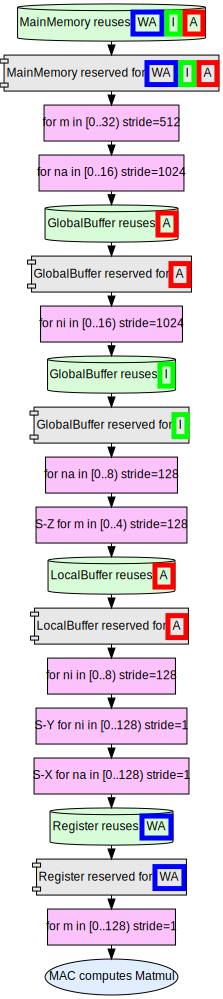

In [4]:
from IPython.display import display, SVG

display(SVG(chosen_mapping.render()))

In [30]:
import csv

with open("ffm_gemm_16k.csv", "w") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["mapper_time", "energy", "latency"])
    writer.writerow([duration, mappings.data.iloc[0]["Total<SEP>energy"], mappings.data.iloc[0]["Total<SEP>latency"]])